In [1]:
import numpy as np
import matplotlib.pyplot as plt
from samp import varimax_projections_2d, asymmetries_x_axis, asymmetries_y_axis, min_max_asymmetries, remove_outliers

In [2]:
tali_pointclouds = np.load('../data/poisson_sampled_mixed_bones_50000.npy')
#selected_elements = [0,1,2,3,4]
#sublist = [element for i, element in enumerate(tali_pointclouds) if i in selected_elements]
sublist = tali_pointclouds
labels = np.load('../data/mixed_bones_labels.npy')

In [3]:
varimax_projections_1st_2nd_component = varimax_projections_2d(sublist)

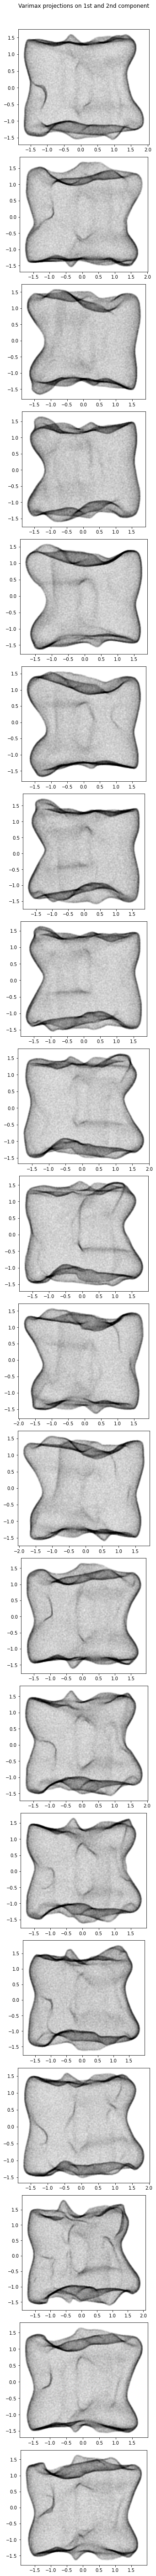

In [4]:
fig, axs = plt.subplots(len(varimax_projections_1st_2nd_component), figsize=(5,4*len(varimax_projections_1st_2nd_component)))
for i, projection in enumerate(varimax_projections_1st_2nd_component):
    axs[i].set_aspect('equal')
    axs[i].scatter(projection[:,0], projection[:,1], marker='.', color='black', alpha=0.02)
fig.suptitle('Varimax projections on 1st and 2nd component')
fig.tight_layout()
fig.subplots_adjust(top=0.97)

Calculating asymmetries for 20 objects


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:45<00:00,  2.29s/it]


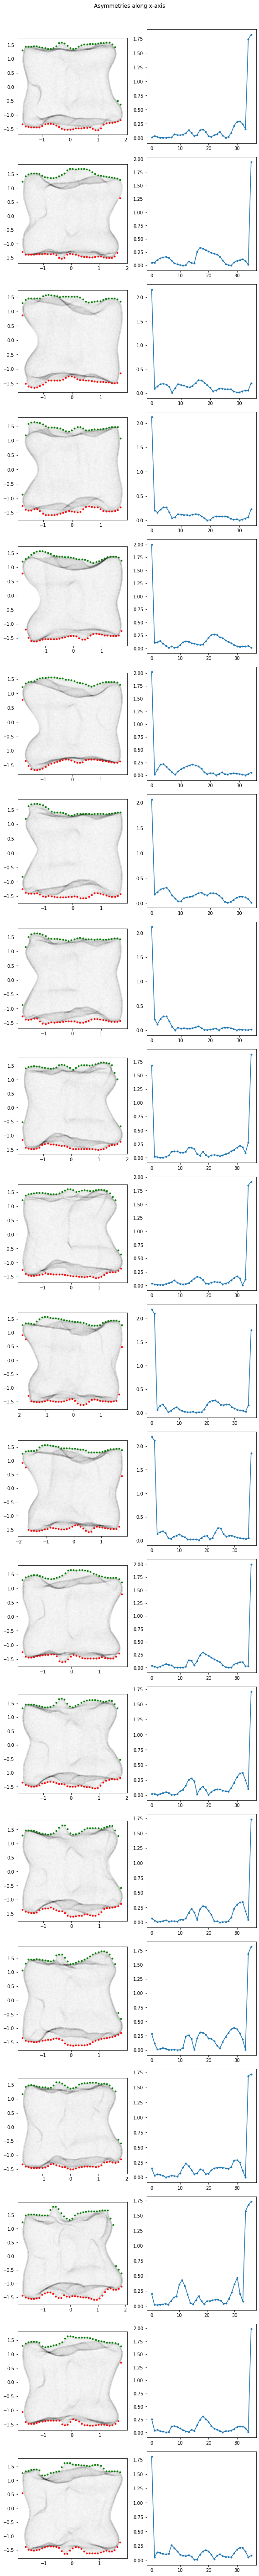

In [5]:
asymmetry_values_x_axis, asymmetries_single_values_x_axis = asymmetries_x_axis(varimax_projections_1st_2nd_component, title='Asymmetries along x-axis', draw=True, stepsize=0.1)

Calculating asymmetries for 20 objects


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.10s/it]


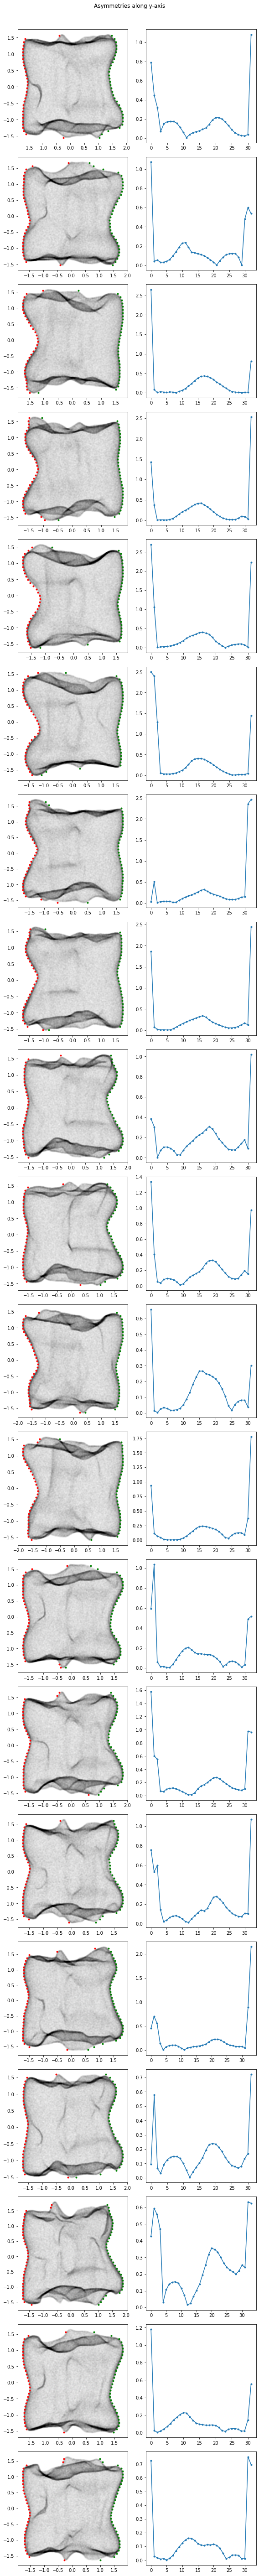

In [6]:
asymmetry_values_y_axis, asymmetries_single_values_y_axis = asymmetries_y_axis(varimax_projections_1st_2nd_component, title='Asymmetries along y-axis', draw=True, stepsize=0.1)

In [8]:
min_max_asym = np.array(min_max_asymmetries(asymmetry_values_x_axis, asymmetry_values_y_axis))

Text(0, 0.5, 'Min asymmetry')

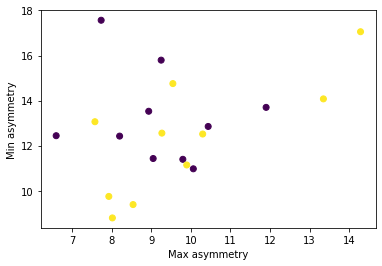

In [9]:
plt.scatter(min_max_asym[:,0], min_max_asym[:,1], c=labels)
plt.xlabel('Max asymmetry')
plt.ylabel('Min asymmetry')

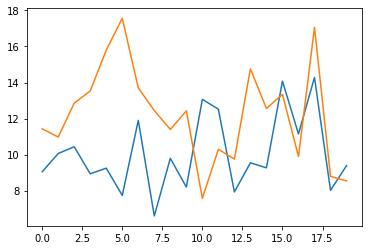

In [10]:
plt.plot(asymmetry_values_x_axis)
plt.plot(asymmetry_values_y_axis)

In [17]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
varimax_projections_1st_3rd_component = varimax_projections_2d(sublist, get_1st_and_3rd_component=True)

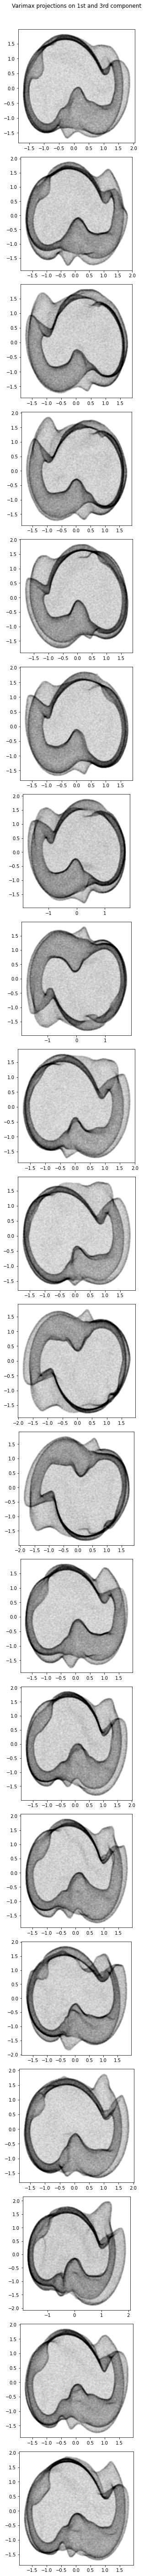

In [12]:
fig, axs = plt.subplots(len(varimax_projections_1st_3rd_component), figsize=(5,4*len(varimax_projections_1st_3rd_component)))
for i, projection in enumerate(varimax_projections_1st_3rd_component):
    axs[i].set_aspect('equal')
    axs[i].scatter(projection[:,0], projection[:,1], marker='.', color='black', alpha=0.02)
fig.suptitle('Varimax projections on 1st and 3rd component')
fig.tight_layout()
fig.subplots_adjust(top=0.97)

In [13]:
asymmetry_values_x_axis_1st_3rd = asymmetries_x_axis(varimax_projections_1st_3rd_component, draw=False, title='Asymmetries along x-axis', stepsize=0.1, tolerance_percentage=0)

Calculating asymmetries for 20 objects


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:43<00:00,  2.15s/it]


In [14]:
asymmetry_values_y_axis_1st_3rd = asymmetries_y_axis(varimax_projections_1st_3rd_component, draw=False, title='Asymmetries along y-axis', stepsize=0.1)

Calculating asymmetries for 20 objects


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.11s/it]


In [15]:
min_max_asym_1st_3rd = np.array(min_max_asymmetries(asymmetry_values_x_axis_1st_3rd, asymmetry_values_y_axis_1st_3rd))

Text(0, 0.5, 'Min asymmetry')

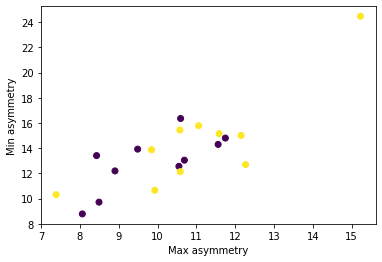

In [16]:
plt.scatter(min_max_asym_1st_3rd[:,0], min_max_asym_1st_3rd[:,1], c=labels)
plt.xlabel('Max asymmetry')
plt.ylabel('Min asymmetry')

## Without outliers

In [12]:
asymmetries_single_values_x_axis_wo_outliers = [remove_outliers(np.array(asymmetries)) for asymmetries in asymmetries_single_values_x_axis]

In [16]:
asymmetries_single_values_y_axis_wo_outliers = [remove_outliers(np.array(asymmetries)) for asymmetries in asymmetries_single_values_y_axis]

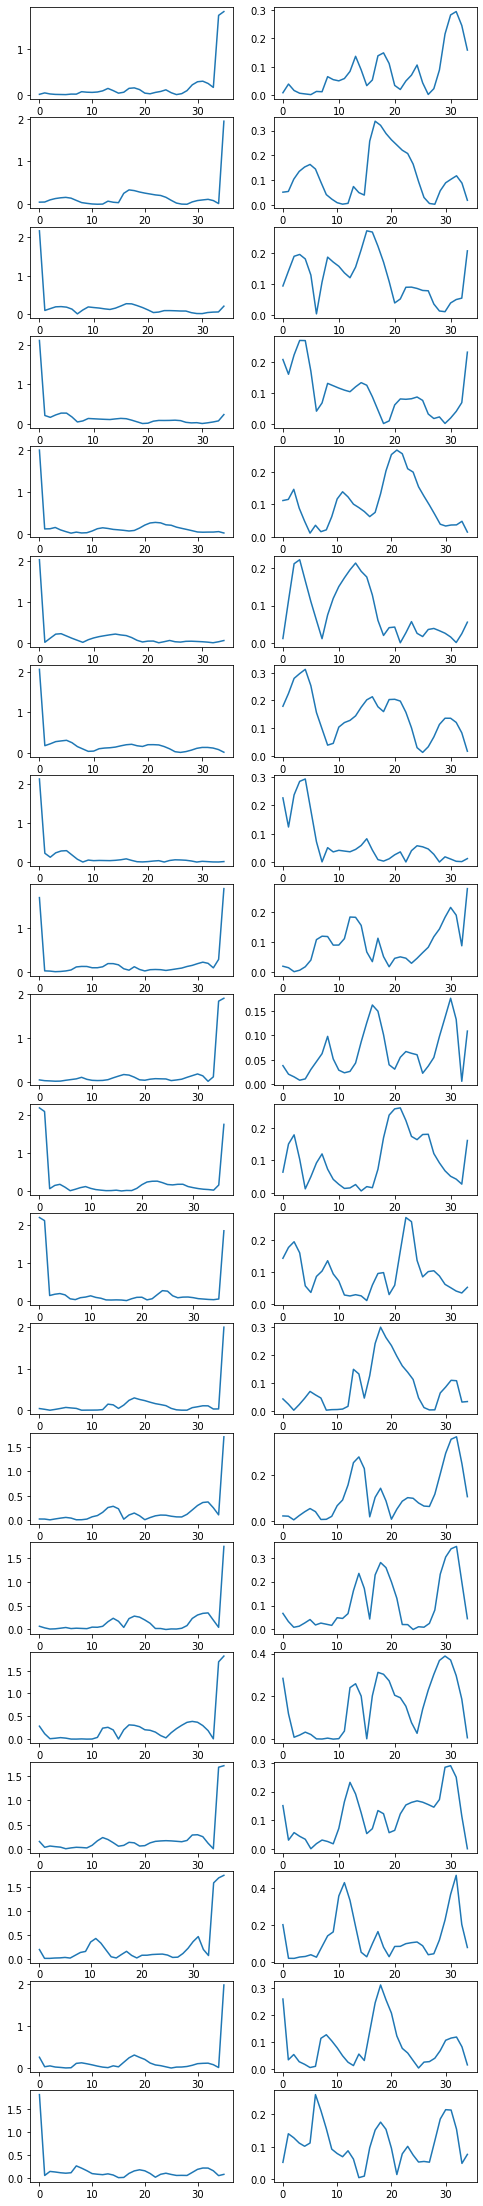

In [14]:
fig, axs = plt.subplots(len(asymmetries_single_values_x_axis), 2, figsize=(8,2*len(asymmetries_single_values_x_axis)))
for i, asymmetries in enumerate(asymmetries_single_values_x_axis):
    axs[i][0].plot(asymmetries)
    axs[i][1].plot(asymmetries_single_values_x_axis_wo_outliers[i])

In [15]:
asymmetries_x_axis_wo_outliers = [sum(x) for x in asymmetries_single_values_x_axis_wo_outliers]

In [17]:
asymmetries_y_axis_wo_outliers = [sum(x) for x in asymmetries_single_values_y_axis_wo_outliers]

In [18]:
min_max_asym_wo_outliers = np.array(min_max_asymmetries(asymmetries_x_axis_wo_outliers, asymmetries_y_axis_wo_outliers))

Text(0, 0.5, 'Min asymmetry')

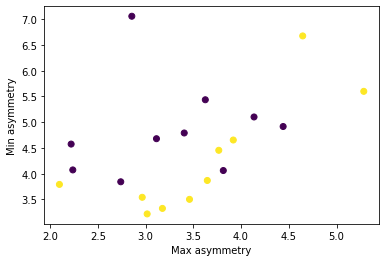

In [19]:
plt.scatter(min_max_asym_wo_outliers[:,0], min_max_asym_wo_outliers[:,1], c=labels)
plt.xlabel('Max asymmetry')
plt.ylabel('Min asymmetry')

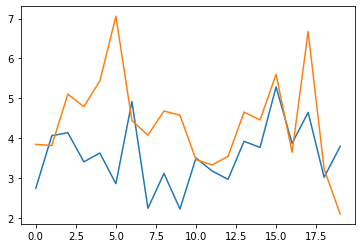

In [20]:
plt.plot(asymmetries_x_axis_wo_outliers)
plt.plot(asymmetries_y_axis_wo_outliers)